In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import os
import warnings
from matplotlib import rc
import networkx as nx
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText
from matplotlib.legend import Legend
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
warnings.simplefilter('ignore')
plt.rcParams['mathtext.fontset'] = 'cm'

runs=50
labels = ['uncoupled', 's_025']
labels2 = [r'$NI$',r'$\sigma_w=0.025$']
colorlist=['r','b']
case=[x for x in labels]

nuc_coup = [[0]]*len(case); nuc_neut = [[0]]*len(case); mit = [[0]]*len(case);

for c in range(len(case)):
    path = "./"+case[c]
    aux1=[]; aux2=[]; aux3=[];
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]       

        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("nuc-mutations.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            aux1.append(int(line.split()[0]))
        inp.close()
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("nuc-neutral-mutations.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            aux2.append(int(line.split()[0]))
        inp.close()
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("mit-mutations.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            aux3.append(int(line.split()[0]))
        inp.close()
        
    nuc_coup[c]=aux1
    nuc_neut[c]=aux2
    mit[c]=aux3

In [ ]:
font = {'family':'sans-serif','weight':'regular', 'style':'normal','size':18,'sans-serif':['Arial']  }
rc('font', **font)
rc('text', usetex=True) 
plt.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]
plt.rcParams['legend.title_fontsize'] = 18
fig, ax = plt.subplots(1,figsize=(8.5,5),sharex='col')
colors1=['firebrick','c']
colors2=['r','b']
names1=[r'$NI$ - coupled sites',r'$\sigma_w=0.025$ - coupled sites']
names2=[r'$NI$',r'$\sigma_w=0.025$']

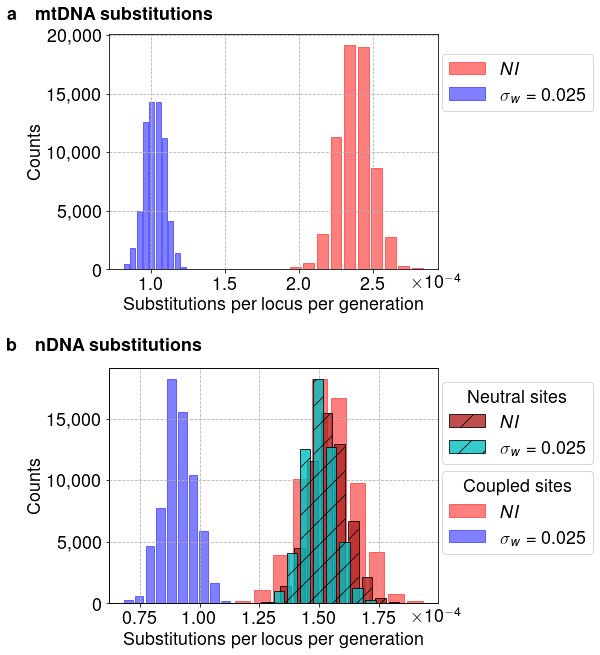

In [3]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

factor = 10000

rate = [i * 1/(2000*500)*factor for i in nuc_coup[0]]
ax[1].hist(rate,color=colors2[0],histtype='barstacked', label=names2[0], alpha=0.5,rwidth=0.8,edgecolor = colors2[0])#,density=True)

rate = [i * 1/(2000*500)*factor for i in nuc_coup[1]]
ax[1].hist(rate,color=colors2[1],histtype='barstacked', label=names2[1], alpha=0.5,rwidth=0.8,edgecolor = colors2[1])#,density=True)
    
ax2 = ax[1].twinx()
rate = [i * 1/(2000*1000)*factor for i in nuc_neut[0]]
ax2.hist(rate,color=colors1[0],histtype='barstacked', label=names2[0], alpha=0.8,rwidth=0.8,edgecolor = 'k',hatch='/')#,density=True

rate = [i * 1/(2000*1000)*factor for i in nuc_neut[1]]
ax2.hist(rate,color=colors1[1],histtype='barstacked', label=names2[1], alpha=0.8,rwidth=0.8,edgecolor ='k',hatch='/')#,density=True


ax[1].set_xlabel('Substitutions per locus per generation')
ax[1].set_ylabel('Counts')
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelright=False,right=False)

ax[1].legend(bbox_to_anchor=(1.5, 0.6),loc='upper right',prop={'size':18},frameon=True,title="Coupled sites")
ax2.legend(bbox_to_anchor=(1.5, 0.98),loc='upper right',prop={'size':18},frameon=True,title="Neutral sites")
ax[1].set_yticklabels(['{:,}'.format(int(x)) for x in ax[1].get_yticks().tolist()])
ax[1].grid(linestyle='--')
plt.text(1,-0.05,r'$\times \mathsf{10^{-4}}$',horizontalalignment='center',verticalalignment='center',transform = ax[1].transAxes)

for c in range(len(case)):
    rate = [i * 1/(2000*500)*factor for i in mit[c]]
    ax[0].hist(rate,color=colorlist[c],histtype='barstacked', label=labels2[c], alpha=0.5,rwidth=0.8,edgecolor = colorlist[c])#,density=True)
ax[0].set_xlabel('Substitutions per locus per generation')
ax[0].set_ylabel('Counts')
ax[0].set_yticklabels(['{:,}'.format(int(x)) for x in ax[0].get_yticks().tolist()])
ax[0].grid(linestyle='--')
ax[0].legend(bbox_to_anchor=(1.5, 0.95),loc='upper right',prop={'size':18},frameon=True)
plt.text(1,-0.05,r'$\times \mathsf{10^{-4}}$',horizontalalignment='center',verticalalignment='center',transform = ax[0].transAxes)

plt.subplots_adjust(hspace=None)
fig.tight_layout()
fig.text(0, 0.9, r"$\bf{a \quad mtDNA \: substitutions}$ ")
fig.text(0, 0.44, r"$\bf{b \quad nDNA \: substitutions}$ ")
fig.patch.set_facecolor('xkcd:white')
fig.subplots_adjust(top=0.88)
# fig.savefig('./Figuras/supp-substitutions.pdf',transparent=True,bbox_inches='tight')